In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg

In [2]:
heights_scores_df = pd.read_excel('heights_scores.xlsx')

In [3]:
heights_scores_df.head()

,chromosome,name,position,sequence,strand,Orc4 WT,"F485A,Y486A","F485Y,Y486F",N489A,Y486Q,...,R478K,N489W,WT_Score,Y486Q_Score,F485I_Score,N489A_Score,R478A_Score,F485A_Y486A_Score,F485I_Y486Q_Score,F485Y_Y486F_Score
0,chr1,ARS104.0,31002,ATTTTTAAGTTTTGT,+,0.003413,0.002510,0.003429,0.006902,0.002925,...,0.001882,0.017493,34.370372,51.645805,56.658085,73.061826,72.320658,56.206879,66.301391,37.956483
1,chr1,ARS106.0,70433,TTTTTTATGTTTAGA,-,0.009110,0.004669,0.007191,0.015777,0.008825,...,0.016224,0.059114,36.436992,51.885729,56.380679,77.187863,69.864997,53.129439,69.231213,39.539934
2,chr1,ARS107.0,124522,ATATTTAAGTCTTGA,-,0.019213,0.029398,0.017015,0.046811,0.022460,...,0.019137,0.158051,28.491761,41.864254,41.955166,54.638782,53.731351,44.530122,54.119721,30.669524
3,chr1,ARS109.0,159951,TTATTTATATTTAGT,+,0.108084,0.007605,0.094314,0.015356,0.027916,...,0.046131,0.064120,35.518618,51.000326,59.396464,78.906114,69.746828,53.350595,69.631498,39.298312
4,chr1,ARS110.0,176232,CTTTTTATGTTTTCT,+,0.175983,0.045903,0.136024,0.007306,0.102775,...,0.009325,0.020461,32.126723,53.120336,52.628486,63.106770,60.962093,60.139333,67.458532,35.443716


In [4]:
WT_heights_df = heights_scores_df[heights_scores_df.columns[5:15]]

In [5]:
WT_heights_df.head()

,Orc4 WT,"F485A,Y486A","F485Y,Y486F",N489A,Y486Q,F485I,"F485I,Y486Q",R478A,R478K,N489W
0,0.003413,0.002510,0.003429,0.006902,0.002925,0.002896,0.003567,0.004890,0.001882,0.017493
1,0.009110,0.004669,0.007191,0.015777,0.008825,0.007296,0.006505,0.026728,0.016224,0.059114
2,0.019213,0.029398,0.017015,0.046811,0.022460,0.034355,0.034207,0.030901,0.019137,0.158051
3,0.108084,0.007605,0.094314,0.015356,0.027916,0.019724,0.005737,0.020899,0.046131,0.064120
4,0.175983,0.045903,0.136024,0.007306,0.102775,0.006356,0.007340,0.007380,0.009325,0.020461


# EdU Heights vs. Heights

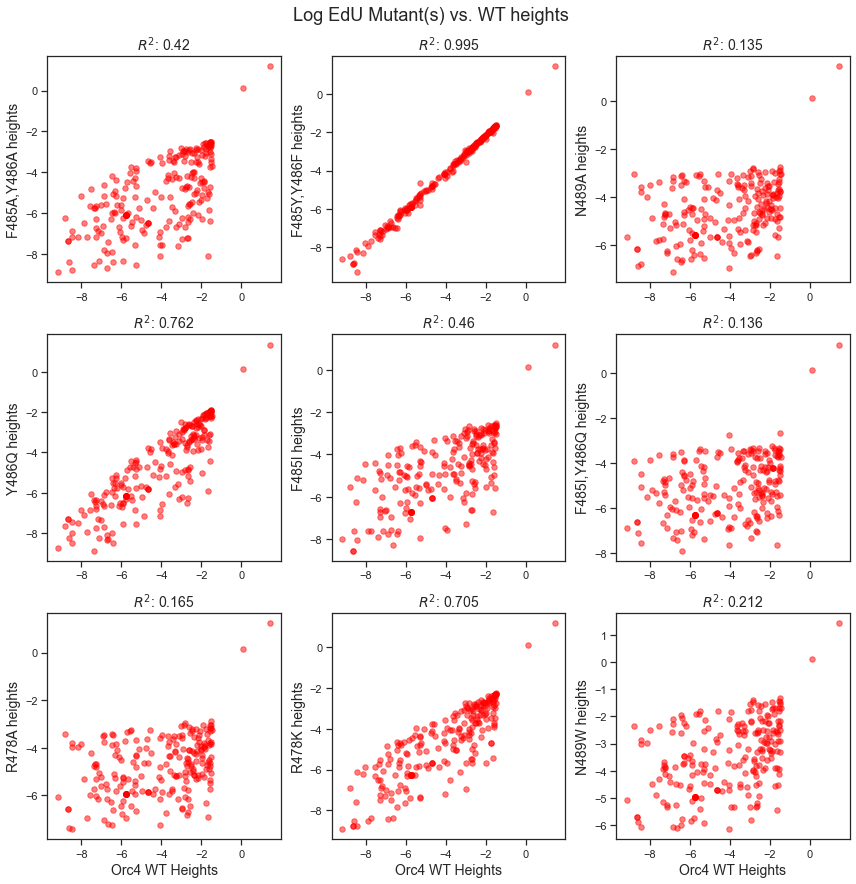

In [6]:

len(WT_heights_df.columns[1:])

num_rows = 3
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols,figsize=(12,12))

mutant_index=1

for i in range(num_rows):
    for j in range(num_cols):
        
        if i==num_rows-1:
            axs[i,j].set_xlabel('Orc4 WT Heights',fontsize=14)
        corr = pg.corr(np.log(WT_heights_df['Orc4 WT'].values), np.log(WT_heights_df[WT_heights_df.columns[mutant_index]].values))    
        #print(corr['r2'].values,corr['p-val'].values)
        rsquared = str(corr['r2'].values[0])
        pvalue = str(corr['p-val'].values[0])
        axs[i,j].set_title('$R^2$: %s'%(rsquared),fontsize=14)
        axs[i,j].set_ylabel(WT_heights_df.columns[mutant_index]+' heights',fontsize=14)
        axs[i, j].scatter(np.log(WT_heights_df['Orc4 WT'].values), np.log(WT_heights_df[WT_heights_df.columns[mutant_index]].values),color='red',s=30,alpha=0.5)
#         axs[i,j].set_xlim(0,0.3)
#         axs[i,j].set_ylim(0,0.3)
        mutant_index+=1

#       axs[i,j].axis('off')

fig.suptitle(" Log EdU Mutant(s) vs. WT heights",y=1.02,fontsize=18)
fig.tight_layout()            
fig.savefig('EdU_log_heights_vs_heights.png',bbox_inches='tight')

In [7]:
heights_scores_df_Sb13 = pd.read_excel('heights_scores.xlsx',sheet_name='ORC-Chip-SB13-Heights')
heights_scores_df_Sb13.head()

,WT,F485I,N489A,F485A_Y486A,F485I_Y486Q,mrc1D
0,0.407393,0.412007,0.475691,0.462545,0.275281,0.607751
1,0.911547,0.614766,0.767423,0.658386,0.432584,1.116911
2,0.354794,0.436338,0.514712,0.552735,0.398876,0.452437
3,0.383574,0.321170,0.438527,0.368490,0.224719,0.487551
4,0.196005,0.295217,0.442244,0.324684,0.224719,0.239049


[0.209] [6.9593153e-13]
[0.114] [2.43780093e-07]
[0.145] [4.27818215e-09]
[0.049] [0.0009506]
[0.151] [2.08139046e-09]


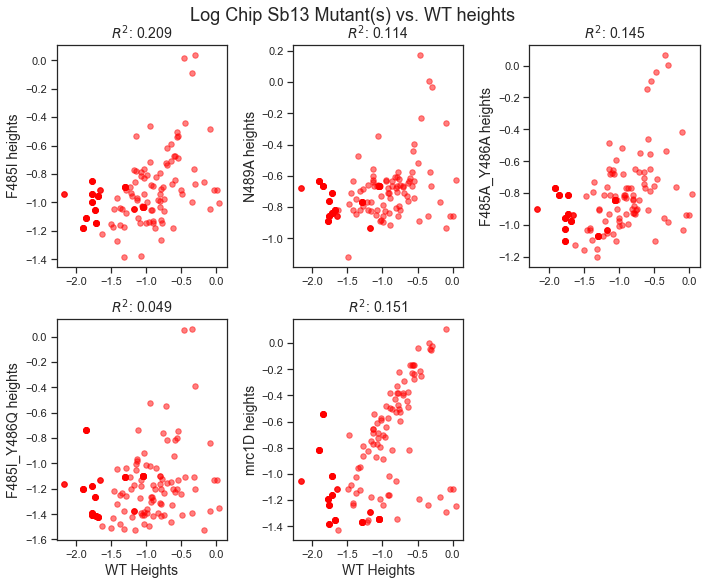

In [8]:

len(heights_scores_df_Sb13.columns[1:])

num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols,figsize=(10,8))

mutant_index=1

for i in range(num_rows):
    for j in range(num_cols):
        
        if mutant_index<6:
            if i==num_rows-1:
                axs[i,j].set_xlabel('WT Heights',fontsize=14)
            corr = pg.corr(np.log(heights_scores_df_Sb13['WT'].values), np.log(heights_scores_df_Sb13[heights_scores_df_Sb13.columns[mutant_index]].values))    
            print(corr['r2'].values,corr['p-val'].values)
            rsquared = str(corr['r2'].values[0])
            pvalue = str(corr['p-val'].values[0])
            axs[i,j].set_title('$R^2$: %s'%(rsquared),fontsize=14)
            axs[i,j].set_ylabel(heights_scores_df_Sb13.columns[mutant_index]+' heights',fontsize=14)
            axs[i, j].scatter(np.log(heights_scores_df_Sb13['WT'].values), np.log(heights_scores_df_Sb13[heights_scores_df_Sb13.columns[mutant_index]].values),color='red',s=30,alpha=0.5)
    #         axs[i,j].set_xlim(0,0.3)
    #         axs[i,j].set_ylim(0,0.3)
            mutant_index+=1
        else:
            axs[i,j].axis('off')

fig.suptitle(" Log Chip Sb13 Mutant(s) vs. WT heights",y=1.01,fontsize=18)
fig.tight_layout()            
fig.savefig('Chip_Sb13_log_heights_vs_heights.png',bbox_inches='tight')

In [9]:
heights_scores_df_mcm = pd.read_excel('heights_scores.xlsx',sheet_name='ORC-Chip-mcm-Heights')
heights_scores_df_mcm.head()

,WT_heights,F485A_Y486A,F485I,F485I_Y486Q,mrc1,N489A
0,0.704117,0.230282,0.197997,0.135,0.977811,0.433031
1,0.378668,0.258075,0.560991,0.515,0.446654,0.405624
2,0.233341,0.609453,0.296995,0.460,0.321410,1.014060
3,1.029567,0.264030,0.801888,0.465,1.054768,0.909913
4,0.810554,1.000536,0.108898,0.625,1.003463,0.131554


[0.087] [8.17710812e-06]
[0.032] [0.00724514]
[0.] [0.87396623]
[0.041] [0.00242526]
[0.01] [0.13370827]


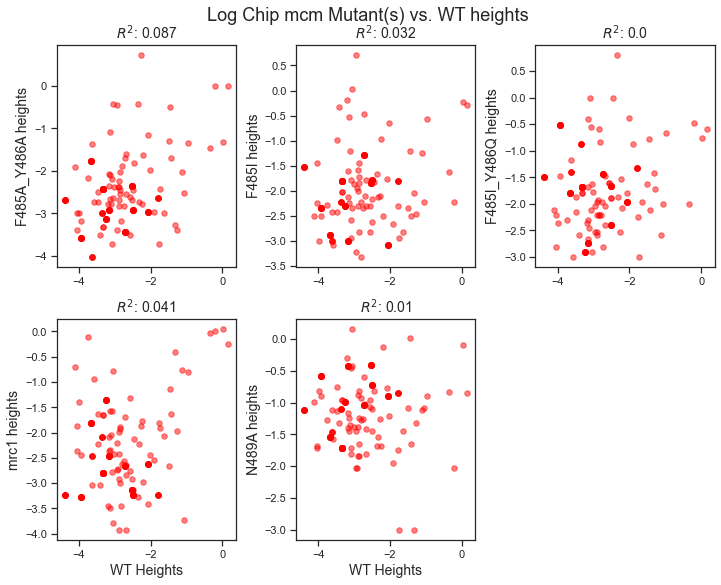

In [10]:

len(heights_scores_df_mcm.columns[1:])

num_rows = 2
num_cols = 3

fig, axs = plt.subplots(num_rows, num_cols,figsize=(10,8))

mutant_index=1

for i in range(num_rows):
    for j in range(num_cols):
        
        if mutant_index<6:
            if i==num_rows-1:
                axs[i,j].set_xlabel('WT Heights',fontsize=14)
            corr = pg.corr(np.log(heights_scores_df_mcm['WT_heights'].values), np.log(heights_scores_df_mcm[heights_scores_df_mcm.columns[mutant_index]].values))    
            print(corr['r2'].values,corr['p-val'].values)
            rsquared = str(corr['r2'].values[0])
            pvalue = str(corr['p-val'].values[0])
            axs[i,j].set_title('$R^2$: %s'%(rsquared),fontsize=14)
            axs[i,j].set_ylabel(heights_scores_df_mcm.columns[mutant_index]+' heights',fontsize=14)
            axs[i, j].scatter(np.log(heights_scores_df_mcm['WT_heights'].values), np.log(heights_scores_df_mcm[heights_scores_df_mcm.columns[mutant_index]].values),color='red',s=30,alpha=0.5)
    #         axs[i,j].set_xlim(0,0.3)
    #         axs[i,j].set_ylim(0,0.3)
            mutant_index+=1
        else:
            axs[i,j].axis('off')

fig.suptitle(" Log Chip mcm Mutant(s) vs. WT heights",y=1.01,fontsize=18)
fig.tight_layout()            
fig.savefig('Chip_mcm_log_heights_vs_heights.png',bbox_inches='tight')

# Heights vs. motif scores EdU

In [11]:
motif_scores_df = pd.read_excel('heights_scores.xlsx',sheet_name='motif_scores')

In [12]:
motif_scores_df = motif_scores_df[motif_scores_df.columns[5:]].copy()
motif_scores_df.head()

,WT_Score,Y486Q_Score,F485I_Score,N489A_Score,R478A_Score,F485A_Y486A_Score,F485I_Y486Q_Score,F485Y_Y486F_Score
0,34.370372,51.645805,56.658085,73.061826,72.320658,56.206879,66.301391,37.956483
1,36.436992,51.885729,56.380679,77.187863,69.864997,53.129439,69.231213,39.539934
2,28.491761,41.864254,41.955166,54.638782,53.731351,44.530122,54.119721,30.669524
3,35.518618,51.000326,59.396464,78.906114,69.746828,53.350595,69.631498,39.298312
4,32.126723,53.120336,52.628486,63.106770,60.962093,60.139333,67.458532,35.443716


In [13]:
ncols = len(WT_heights_df.columns)
nrows = len(motif_scores_df.columns)

corr_df = pd.DataFrame(columns=WT_heights_df.columns, index=motif_scores_df.columns)
corr_mat = np.zeros([nrows,ncols])


for row in range(nrows):
    for column in range(ncols):
        corr = pg.corr(motif_scores_df[motif_scores_df.columns[row]],np.log(WT_heights_df[WT_heights_df.columns[column]]) )
        corr_mat[row][column] = corr['r'] 

In [14]:
corr_mat.shape

(8, 10)

In [15]:
corr_df = pd.DataFrame(corr_mat,columns=WT_heights_df.columns, index=motif_scores_df.columns)

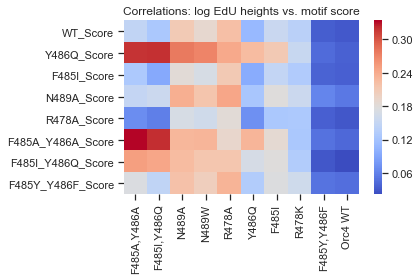

In [16]:
sns.heatmap(corr_df[['F485A,Y486A', 'F485I,Y486Q','N489A','N489W', 'R478A', 
                     'Y486Q', 'F485I',
                      'R478K', 'F485Y,Y486F','Orc4 WT']],cmap='coolwarm')
plt.title('Correlations: log EdU heights vs. motif score')
plt.tight_layout()
plt.savefig('log_EdU_heights_vs_motif_score_corr.png')

# Heights vs. motif scores Orc ChiP Sb13

In [17]:
ncols = len(heights_scores_df_Sb13.columns)
nrows = len(motif_scores_df.columns)

corr_df = pd.DataFrame(columns=heights_scores_df_Sb13.columns, index=motif_scores_df.columns)
corr_mat = np.zeros([nrows,ncols])


for row in range(nrows):
    for column in range(ncols):
        corr = pg.corr(motif_scores_df[motif_scores_df.columns[row]],np.log(heights_scores_df_Sb13[heights_scores_df_Sb13.columns[column]]) )
        corr_mat[row][column] = corr['r'] 

In [18]:
corr_df = pd.DataFrame(corr_mat,columns=heights_scores_df_Sb13.columns, index=motif_scores_df.columns)

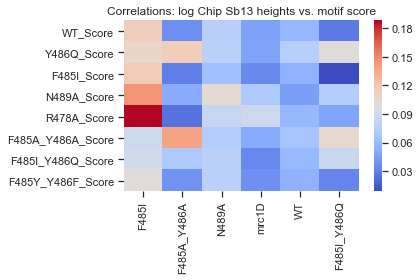

In [19]:
sns.heatmap(corr_df[['F485I','F485A_Y486A','N489A','mrc1D','WT','F485I_Y486Q' ]],cmap='coolwarm')
plt.title('Correlations: log Chip Sb13 heights vs. motif score')
plt.tight_layout()
plt.savefig('log_Chip_Sb13_heights_vs_motif_score_corr.png')

# Heights vs. motif scores Orc ChiP mcm

In [20]:
ncols = len(heights_scores_df_mcm.columns)
nrows = len(motif_scores_df.columns)

corr_df = pd.DataFrame(columns=heights_scores_df_mcm.columns, index=motif_scores_df.columns)
corr_mat = np.zeros([nrows,ncols])


for row in range(nrows):
    for column in range(ncols):
        corr = pg.corr(motif_scores_df[motif_scores_df.columns[row]],np.log(heights_scores_df_mcm[heights_scores_df_mcm.columns[column]]) )
        corr_mat[row][column] = corr['r'] 

In [21]:
corr_df = pd.DataFrame(corr_mat,columns=heights_scores_df_mcm.columns, index=motif_scores_df.columns)

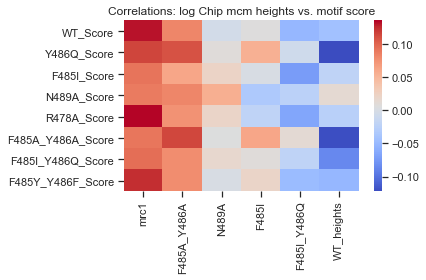

In [22]:
sns.heatmap(corr_df[['mrc1','F485A_Y486A','N489A','F485I',  'F485I_Y486Q', 'WT_heights']],cmap='coolwarm')
plt.title('Correlations: log Chip mcm heights vs. motif score')
plt.tight_layout()
plt.savefig('log_Chip_mcm_heights_vs_motif_score_corr.png')

In [23]:
len(heights_scores_df_mcm)

222